In [41]:
import pathlib

import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
from matplotlib.animation import PillowWriter
import scienceplots
plt.style.use(['science', 'notebook'])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [42]:
device

device(type='cpu')

In [43]:
r = torch.rand((2, 2))*5

v = torch.rand((2, 2))

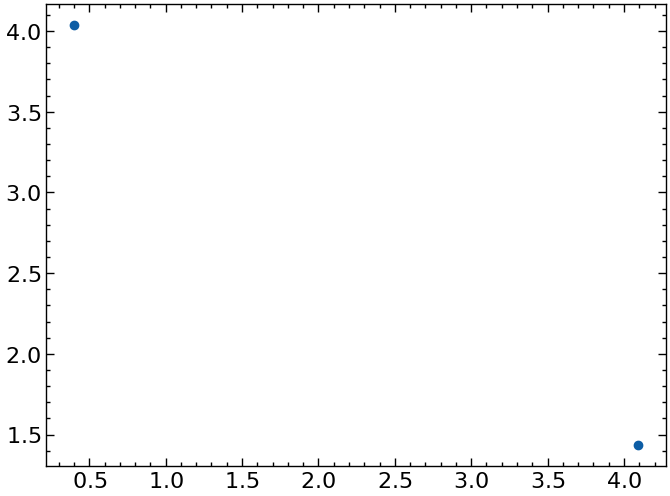

In [44]:
plt.scatter(r[0, :], r[1, :])

In [45]:
def motion(r, v, ts, dt):
    rs = torch.zeros((ts, r.shape[0], r.shape[1])).to(device)
    fs = torch.zeros((ts, r.shape[0])).to(device)
    rs[0] = r
    k = 1
    
    for i in range(1, ts):
        dr = r[:, 0] - r[:, 1]
        f = k * dr / dr.norm()
        v[:, 0] -= f * dt
        v[:, 1] += f * dt
        r += v * dt
        rs[i] = r
        fs[i] = f
    
    return rs, fs

In [46]:
rs, fs = motion(r, v, ts=1000, dt=0.08)

In [47]:
rs

tensor([[[ 4.0897,  0.4002],
         [ 1.4345,  4.0368]],

        [[ 4.1627,  0.4635],
         [ 1.4567,  4.0729]],

        [[ 4.2305,  0.5319],
         [ 1.4827,  4.1052]],

        ...,

        [[69.6237, 70.6760],
         [30.0687, 33.5967]],

        [[69.7130, 70.7229],
         [30.1810, 33.5428]],

        [[69.8041, 70.7681],
         [30.2994, 33.4827]]])

In [48]:
fs

tensor([[ 0.0000,  0.0000],
        [ 0.8172, -0.5764],
        [ 0.8165, -0.5774],
        ...,
        [-0.2841, -0.9588],
        [-0.2858, -0.9583],
        [-0.2877, -0.9577]])

tensor([[ 0.0000,  0.0000],
        [ 0.8172, -0.5764],
        [ 0.8165, -0.5774],
        [ 0.8157, -0.5784],
        [ 0.8150, -0.5794],
        [ 0.8143, -0.5805],
        [ 0.8136, -0.5815],
        [ 0.8128, -0.5825],
        [ 0.8120, -0.5836],
        [ 0.8112, -0.5847]])

MovieWriter ffmpeg unavailable; using Pillow instead.


i=0
i=0
i=0
i=0
i=1
i=2
i=3
i=4
i=5
i=6
i=7
i=8
i=9
i=10
i=11
i=12
i=13
i=14
i=15
i=16
i=17
i=18
i=19
i=20
i=21
i=22
i=23
i=24
i=25
i=26
i=27
i=28
i=29
i=30
i=31
i=32
i=33
i=34
i=35
i=36
i=37
i=38
i=39
i=40
i=41
i=42
i=43
i=44
i=45
i=46
i=47
i=48
i=49
i=50
i=51
i=52
i=53
i=54
i=55
i=56
i=57
i=58
i=59
i=60
i=61
i=62
i=63
i=64
i=65
i=66
i=67
i=68
i=69
i=70
i=71
i=72
i=73
i=74
i=75
i=76
i=77
i=78
i=79
i=80
i=81
i=82
i=83
i=84
i=85
i=86
i=87
i=88
i=89
i=90
i=91
i=92
i=93
i=94
i=95
i=96
i=97
i=98
i=99


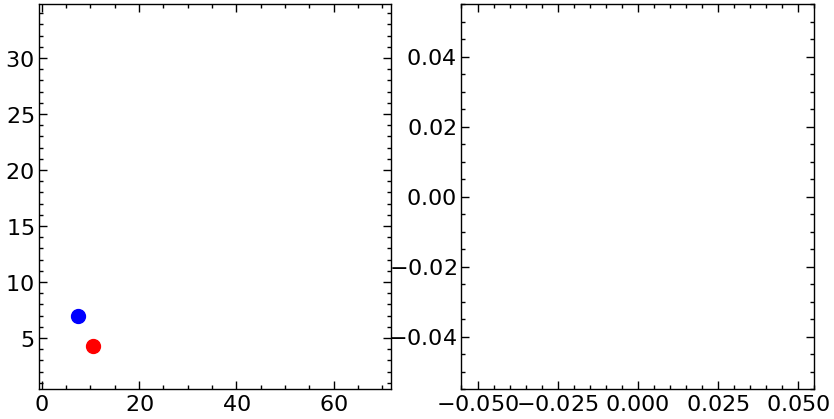

In [54]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].clear()
ax[1].clear()
vmin = 0
vmax = 1
ax[0].set_xlim(torch.min(rs[:, 0, :]) - 1, torch.max(rs[:, 0, :]) + 1)
ax[0].set_ylim(torch.min(rs[:, 1, :]) - 1, torch.max(rs[:, 1, :]) + 1)
markersize = 10
red, = ax[0].plot([], [], 'o', color='red', markersize=markersize)
blue, = ax[0].plot([], [], 'o', color='blue', markersize=markersize)
force, = ax[1].plot([], [], color='k')

def animate(i):
    print(f"{i=}")
    xred, yred = rs[i][0][0:1].cpu(), rs[i][1][0:1].cpu()
    xblue, yblue = rs[i][0][1:2].cpu(),rs[i][1][1:2].cpu()
    red.set_data(xred, yred)
    blue.set_data(xblue, yblue)
    force.set_data(np.arange(i), fs[0:i].cpu())
    return red, blue

# writer = animation.FFMpegWriter(fps=30)
ani = animation.FuncAnimation(fig, animate, frames=100, interval=25, blit=True)
path = pathlib.Path('./ani3.gif')
ani.save(path, dpi=100)